In [138]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

In [139]:
iris_df = pd.read_csv('i200569 Dania Jawad - iris.csv')


iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [140]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [141]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [142]:
df=iris_df.copy()

In [143]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [144]:
data=df['sepal_length'].to_numpy()

### Use library i.e pymc3 or arviz and plot the above data on KDE plot 

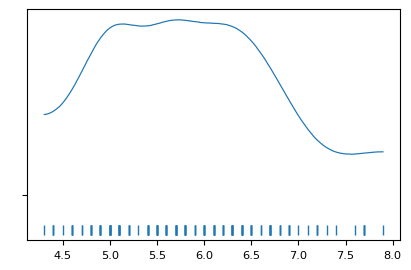

In [145]:
# write your code here for plotting data variable here, you can take help from book chapter 2 ipynb file on GCR

az.plot_kde(data, rug=True,figsize=(4,2.6))
plt.yticks([0], alpha=0)
plt.savefig('KDE.png', dpi=300)


# creation of the Model here 

In [174]:
with pm.Model() as model_iris:
      #  Choose priors and likelyhood
  
    μ = pm.Uniform('μ', lower=5.6, upper=6.1)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data)
    # write your inference variable here
 
    data_iris = pm.sample(1000, return_inferencedata=True)
     # create your model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
The acceptance probability does not match the target. It is 0.891496237235633, but should be close to 0.8. Try to increase the number of tuning steps.


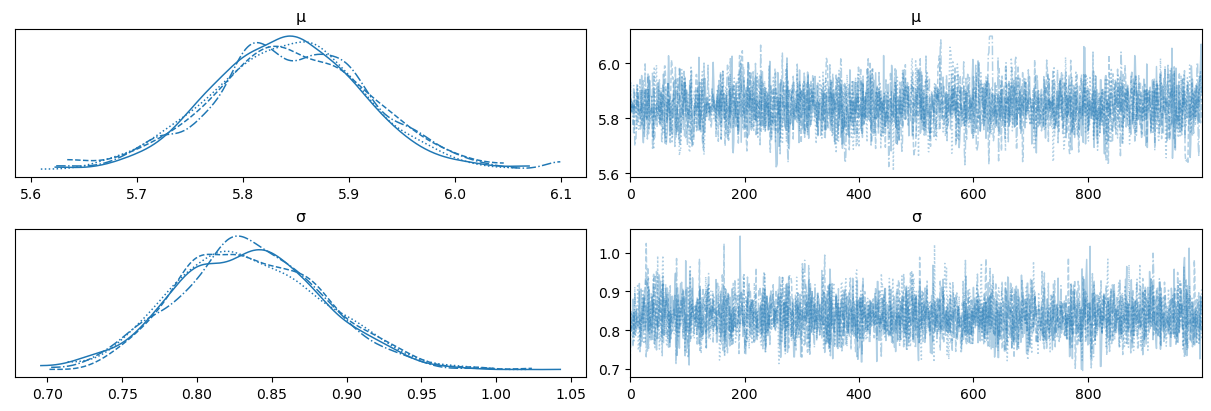

In [159]:
# plot your model inference variable here using library we disscussed in class
az.plot_trace(data_iris)
plt.savefig('inferenceVar.png', dpi=300)

# write code here for pair plot and check the estemate for two priors

C:\Users\Hp\.conda\envs\pm3bap\lib\site-packages\arviz\plots\jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")


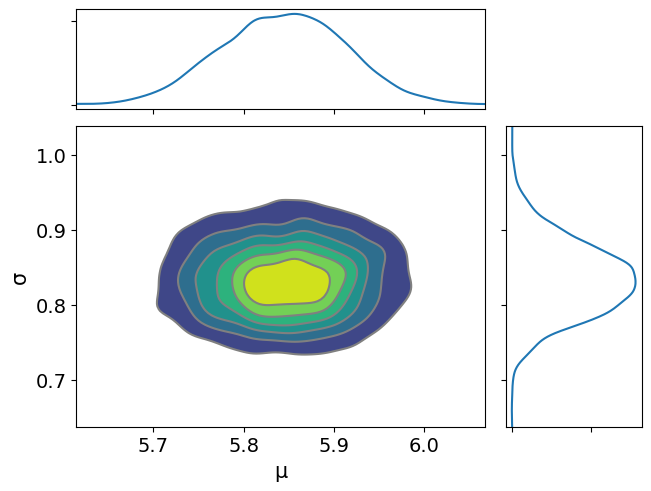

In [176]:
# write code here for pair plot and check the estemate for two priors
az.plot_joint(data_iris, kind='kde', fill_last=False)
plt.savefig('pair_plot.png', dpi=300)

# write code here to summarise the results

In [167]:
# write code here to summarise the results
az.summary(data_iris)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,5.846,0.069,5.714,5.971,0.001,0.001,2957.0,2473.0,1.0
σ,0.835,0.048,0.746,0.923,0.001,0.001,2561.0,2579.0,1.0


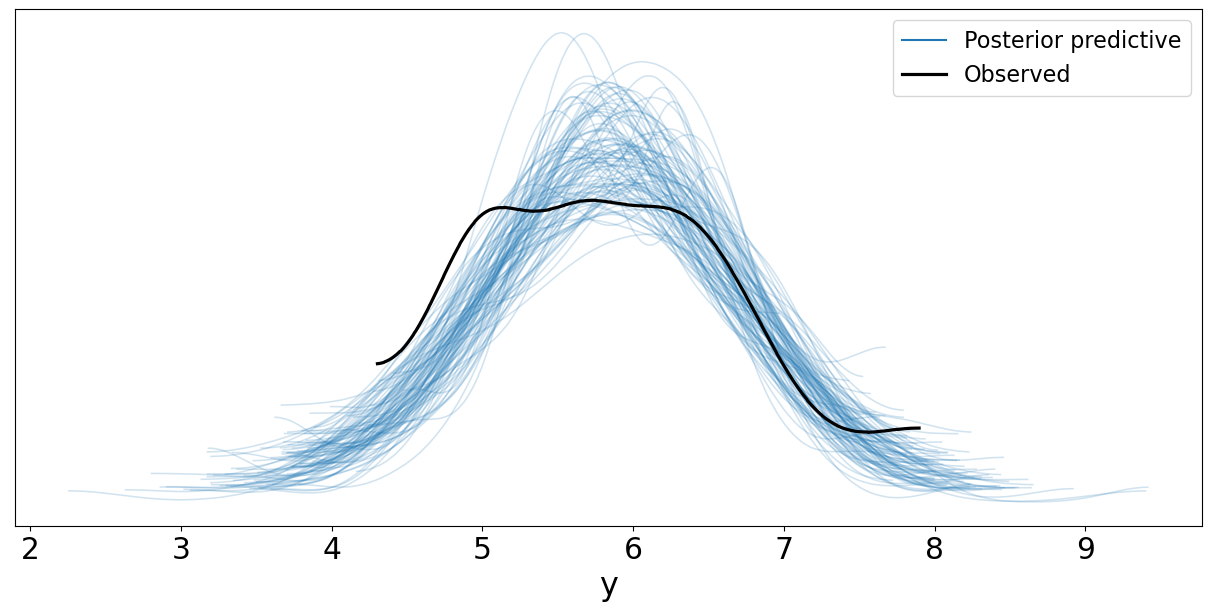

In [168]:
# write code for compairision of your results here 
y_pred_g = pm.sample_posterior_predictive(data_iris, model=model_iris, keep_size=True)
az.concat(data_iris, az.from_dict(posterior_predictive=y_pred_g), inplace=True)
ax = az.plot_ppc(data_iris, num_pp_samples=100, figsize=(12, 6), mean=False)
plt.savefig('compareRes.png', dpi=300)

# You can work on Student T model incase if results are not robust from above model?

In [169]:
#the results from above model are already robust so we dont have the need to use student T model

# Group Comparison 

In [153]:
#importing dataset from the given file
tips = pd.read_csv('i200569 Dania Jawad - iris.csv')
tips.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [154]:
com = iris_df['sepal_length'].values
idx = pd.Categorical(tips['species'],
                     categories=['versicolor', 'setosa', 'virginica']).codes
groups = len(np.unique(idx))

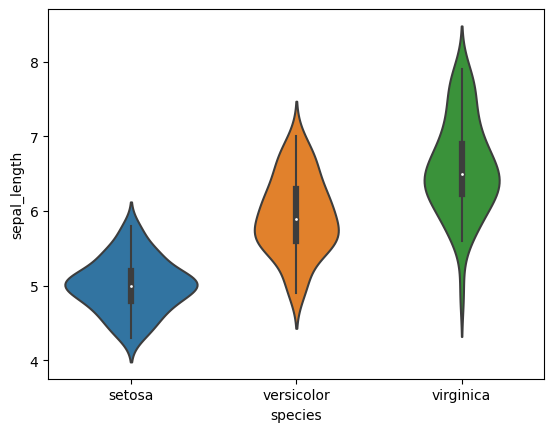

In [178]:
sns.violinplot(x='species', y='sepal_length', data=tips)
plt.savefig('violinPLot.png', dpi=300)

In [155]:
groups

3

In [156]:
tip = tips['sepal_length'].values

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 56 seconds.


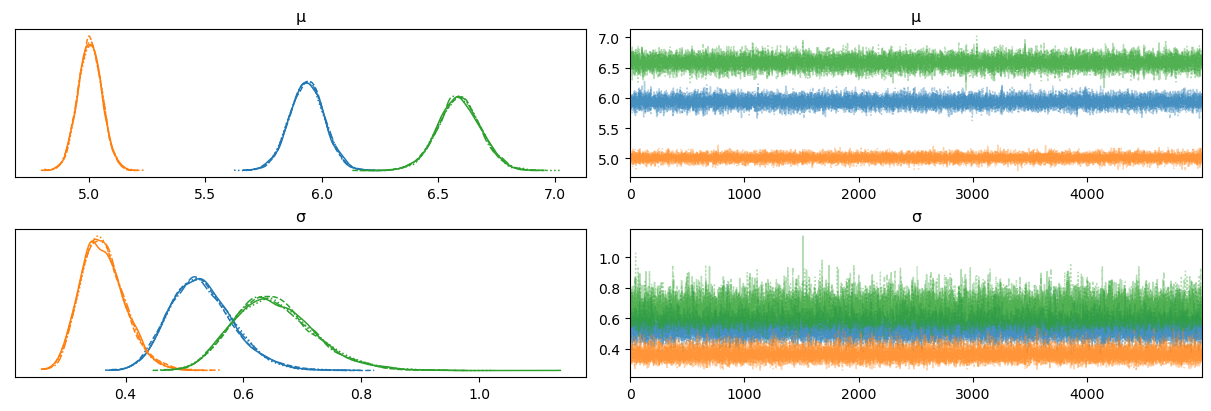

In [157]:
with pm.Model() as comparing_groups:
  # write code for model
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)

    compare_data = pm.sample(5000, return_inferencedata=True)
az.plot_trace(compare_data)
plt.savefig('comparing_groups.png', dpi=300)
  

In [158]:
# summarize the inference variable for groups
az.summary(compare_data)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],5.936,0.075,5.796,6.079,0.000,0.0,25158.0,16085.0,1.0
μ[1],5.006,0.052,4.905,5.099,0.000,0.0,29562.0,16105.0,1.0
μ[2],6.588,0.093,6.426,6.776,0.001,0.0,26049.0,14358.0,1.0
σ[0],0.530,0.055,0.432,0.633,0.000,0.0,26628.0,16180.0,1.0
σ[1],0.362,0.038,0.294,0.431,0.000,0.0,27768.0,16560.0,1.0
σ[2],0.652,0.069,0.529,0.780,0.000,0.0,27355.0,17071.0,1.0


# Your results interpretation here 

In [ ]:
# interpret group comparison here 

The table above shows the summary of multiple parameter model that we have used for modeling our dataset.
The first 3 rows represent posterior mean  which have small value for HDIs as shown in the table. These suggest that the 
model has greater or likely higher precision of approximating these values
The last 3 rows represent posterior mean and these have slightly larger values for HDIs, This suggests that an uncertainty
element is present.

To add more, we can see large values of ess_tail and ess_bulk indicate that distribution is good approximation and the 1.0 
value of r_hat shows convergence.

To conclude, the results indicate that our model predicts the location parameters like μ with greater precision and may involve 
an uncertainty element in scale paramters like σ.
